In [155]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

I have used the given database 4.1.The database Values or the actual table is been copied to another excel file and the following visulaistaionas are done on that file

In [157]:
#Data from 4.1 loaded
data = pd.read_excel('4.1NEWW.xlsx')
data

,Item Desription,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
0,Gross Value Added,794894,810124,822848,875123,921207,998145,1094795,1171388,1222545,1201747,1235990,1310070
1,consumption of fixed capital,98623,102211,107181,111909,117267,124093,131115,137992,145239,153141,160876,171288
2,Net Value Added,696271,707913,715667,763214,803940,874052,963680,1033396,1077306,1048606,1075114,1138782
3,central government*,196076,201181,203550,221388,225046,265516,289744,295104,305293,294045,286830,290766
4,state government,385345,390989,398809,417947,446450,469464,524478,579057,595104,580246,607806,658918
5,Andhra Pradesh,19150,19058,20027,23056,28425,27573,30358,33630,34666,35456,35230,37046
6,Arunachal Pradesh,1960,2020,2201,2267,2500,2816,3453,3183,3427,3364,3617,3900
7,Assam,11815,12045,13357,14166,16973,17481,21886,20295,20693,19229,23330,27009
8,Bihar,19967,21787,22461,22472,23284,24575,27290,31627,30952,29026,28026,35989
9,Chhattisgarh,8750,8756,8903,9194,9697,10290,11460,14848,17832,16657,17086,18669


Basic data description

In [159]:
data.describe()


,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01
mean,70300.105263,71556.578947,72636.105263,77142.289474,81389.578947,87889.631579,9.678284e+04,1.040850e+05,1.083553e+05,1.061144e+05,1.093395e+05,1.162589e+05
std,175575.704687,178731.582763,181288.839693,192841.408559,203136.502306,220255.178391,2.424031e+05,2.600297e+05,2.707933e+05,2.648951e+05,2.722782e+05,2.889400e+05
min,966.000000,1003.000000,1057.000000,1196.000000,1206.000000,1140.000000,1.174000e+03,1.519000e+03,1.760000e+03,1.592000e+03,1.680000e+03,1.787000e+03
25%,6056.000000,5968.250000,6847.500000,7433.000000,7838.250000,8825.250000,9.944000e+03,1.052225e+04,1.005725e+04,1.044625e+04,1.088000e+04,1.173300e+04
50%,13118.000000,13226.500000,13838.500000,15463.500000,16657.000000,16884.000000,1.953450e+04,2.027850e+04,2.051600e+04,2.037100e+04,2.188650e+04,2.330550e+04
75%,26085.500000,26791.750000,27561.750000,27021.750000,28851.750000,30430.750000,3.400200e+04,4.078425e+04,4.129175e+04,4.062450e+04,4.376350e+04,4.831575e+04
max,794894.000000,810124.000000,822848.000000,875123.000000,921207.000000,998145.000000,1.094795e+06,1.171388e+06,1.222545e+06,1.201747e+06,1.235990e+06,1.310070e+06


In [168]:
# Check dataset structure again
data.info()

# Display unique values in "Item Desription" to confirm category names
data["Item Desription"].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Item Desription  38 non-null     object
 1   2011-12          38 non-null     int64 
 2   2012-13          38 non-null     int64 
 3   2013-14          38 non-null     int64 
 4   2014-15          38 non-null     int64 
 5   2015-16          38 non-null     int64 
 6   2016-17          38 non-null     int64 
 7   2017-18          38 non-null     int64 
 8   2018-19          38 non-null     int64 
 9   2019-20          38 non-null     int64 
 10  2020-21          38 non-null     int64 
 11  2021-22          38 non-null     int64 
 12  2022-23          38 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 4.0+ KB


array(['Gross Value Added', 'consumption of fixed capital',
       'Net Value Added', 'central government*', 'state government',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamilnadu', 'Telangana', 'Tripura',
       'Uttarakhand', 'Uttar Pradesh', 'West Bengal', 'local bodies',
       'autonomous institutions'], dtype=object)

       Item Desription  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  \
3  central government*   196076   201181   203550   221388   225046   265516   
4     state government   385345   390989   398809   417947   446450   469464   

   2017-18  2018-19  2019-20  2020-21  2021-22  2022-23  
3   289744   295104   305293   294045   286830   290766  
4   524478   579057   595104   580246   607806   658918  


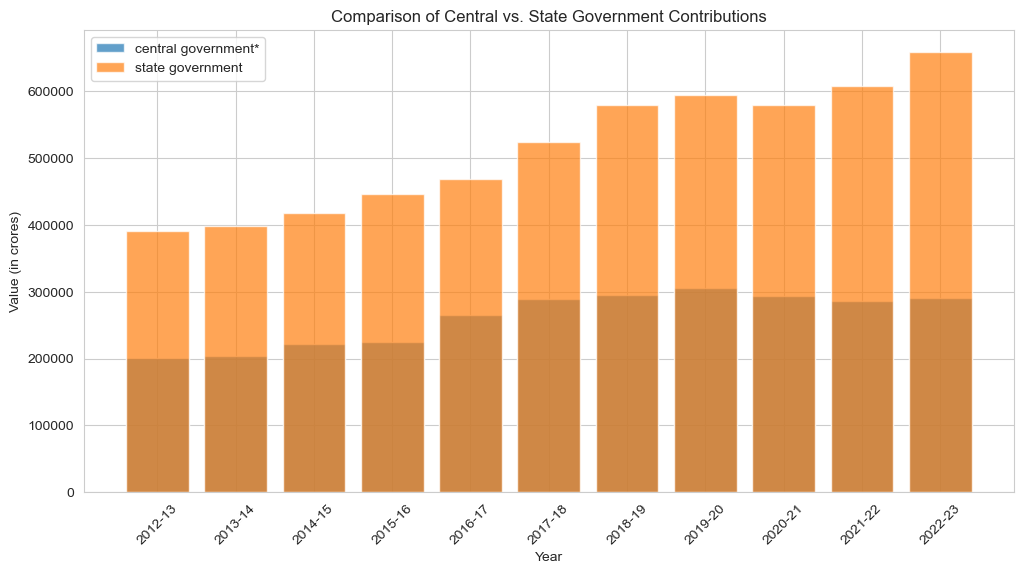

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "4.1NEWW.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Clean column names
df.columns = df.columns.str.strip()
df["Item Desription"] = df["Item Desription"].astype(str).str.strip()

# Select correct year range
years = df.columns[2:14]  # Adjust as necessary

# Extract government-related data
gov_metrics = ["central government*", "state government"]
df_gov = df[df["Item Desription"].isin(gov_metrics)]

# Debugging step: Check what data is extracted
print(df_gov)

# Plot bar chart
plt.figure(figsize=(12, 6))
for index, row in df_gov.iterrows():
    plt.bar(years, row[years], label=row["Item Desription"], alpha=0.7)

plt.xlabel("Year")
plt.ylabel("Value (in crores)")
plt.title("Comparison of Central vs. State Government Contributions")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [180]:
print(df.columns)

Index(['Item Desription', '2011-12', '2012-13', '2013-14', '2014-15',
       '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21',
       '2021-22', '2022-23'],
      dtype='object')


<Figure size 1200x600 with 0 Axes>

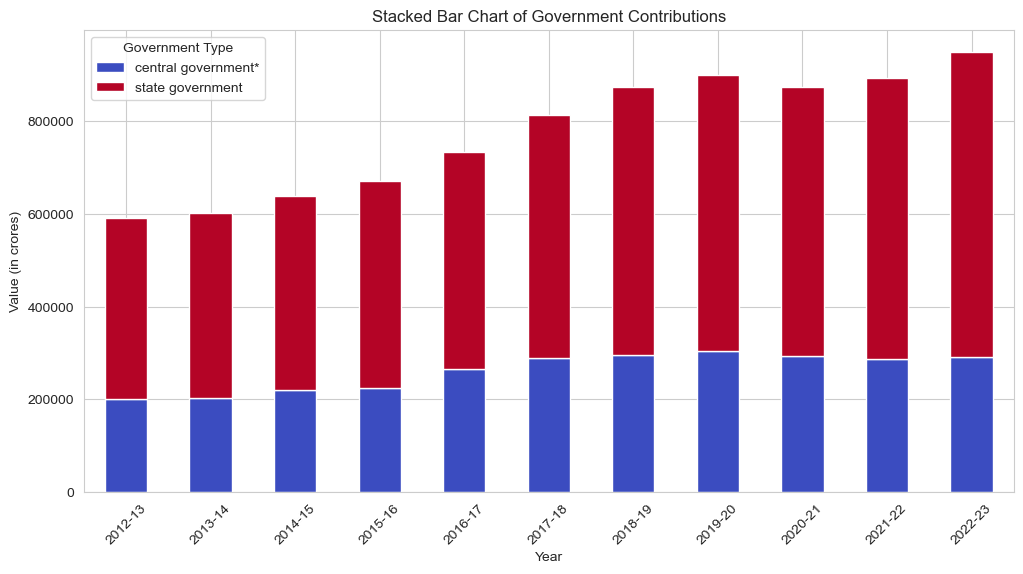

In [190]:
import seaborn as sns

plt.show()

# --- 1. Government Contributions (Stacked Bar Chart) ---
plt.figure(figsize=(12, 6))
df_gov.set_index("Item Desription")[years].T.plot(kind="bar", stacked=True, figsize=(12,6), colormap="coolwarm")
plt.xlabel("Year")
plt.ylabel("Value (in crores)")
plt.title("Stacked Bar Chart of Government Contributions")
plt.xticks(rotation=45)
plt.legend(title="Government Type")
plt.show()

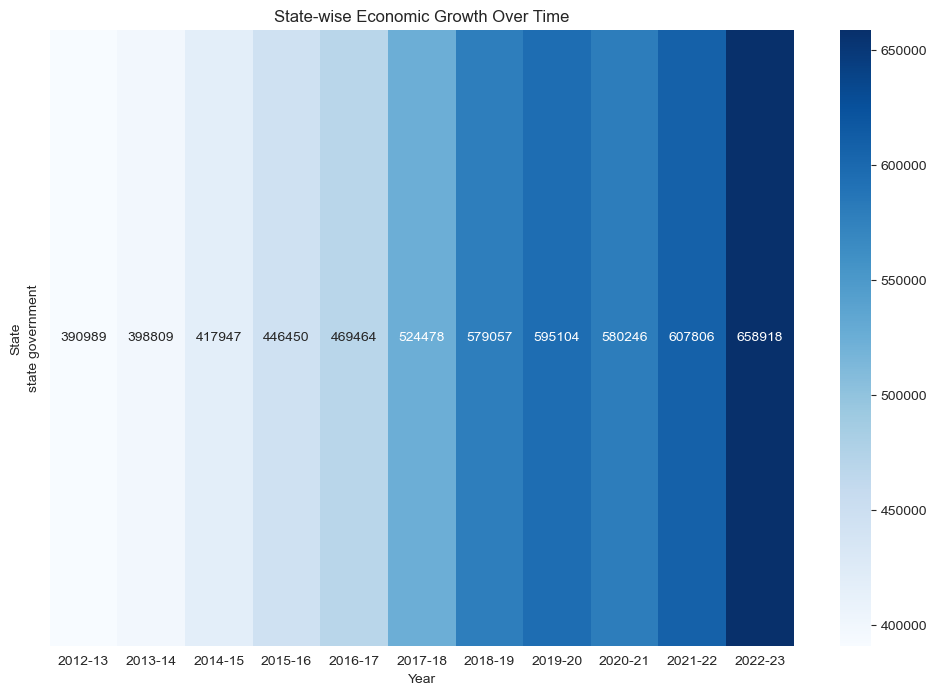

In [186]:
# --- 2. State-wise Economic Growth (Heatmap) ---
state_data = df[df["Item Desription"].str.contains("state", case=False, na=False)][["Item Desription"] + list(years)]
state_data = state_data.set_index("Item Desription")

plt.figure(figsize=(12, 8))
sns.heatmap(state_data, cmap="Blues", annot=True, fmt=".0f")
plt.title("State-wise Economic Growth Over Time")
plt.xlabel("Year")
plt.ylabel("State")
plt.show()

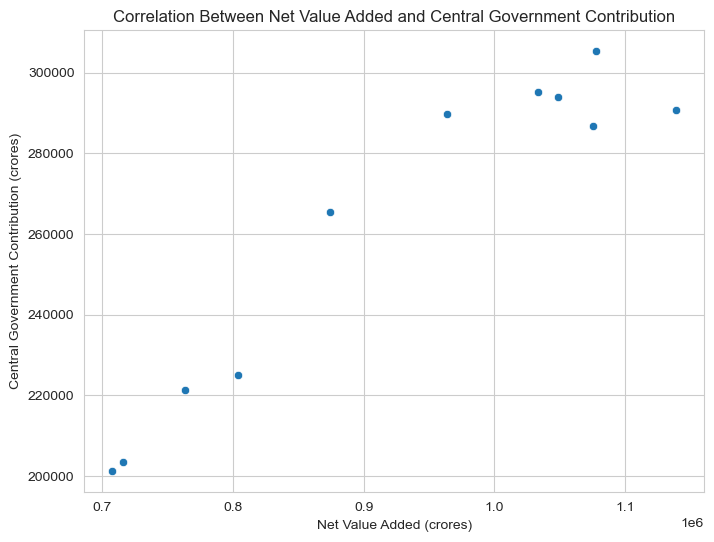

In [188]:

#  Correlation Between Net Value Added and Government Contributions (Scatter Plot) ---
net_value_added = df[df["Item Desription"] == "Net Value Added"][years].values.flatten()
central_gov = df[df["Item Desription"] == "central government*"][years].values.flatten()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=net_value_added, y=central_gov)
plt.xlabel("Net Value Added (crores)")
plt.ylabel("Central Government Contribution (crores)")
plt.title("Correlation Between Net Value Added and Central Government Contribution")
plt.show()

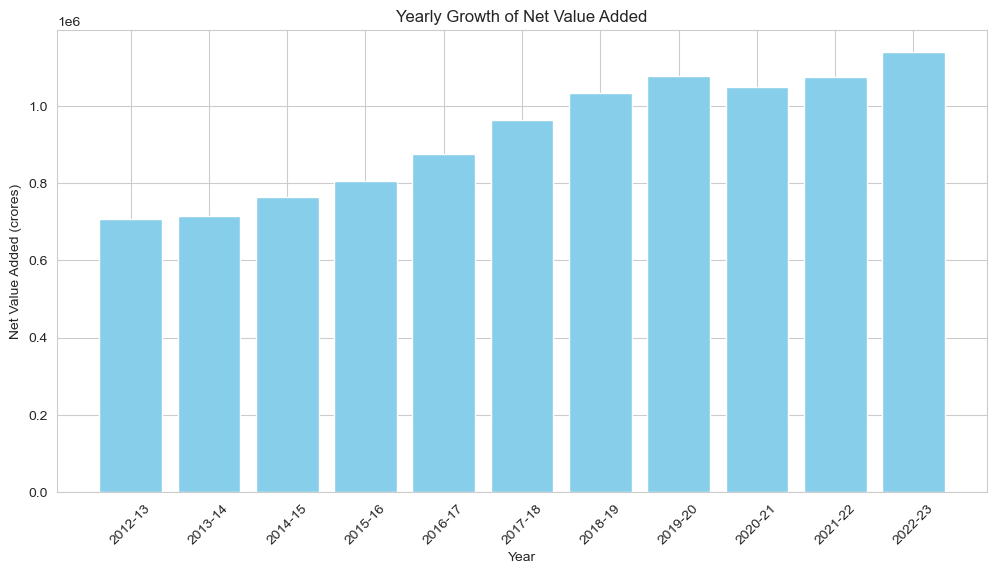

In [194]:
plt.figure(figsize=(12, 6))
net_value_added = df[df["Item Desription"] == "Net Value Added"][years].values.flatten()
plt.bar(years, net_value_added, color='skyblue')

plt.xlabel("Year")
plt.ylabel("Net Value Added (crores)")
plt.title("Yearly Growth of Net Value Added")
plt.xticks(rotation=45)
plt.show()


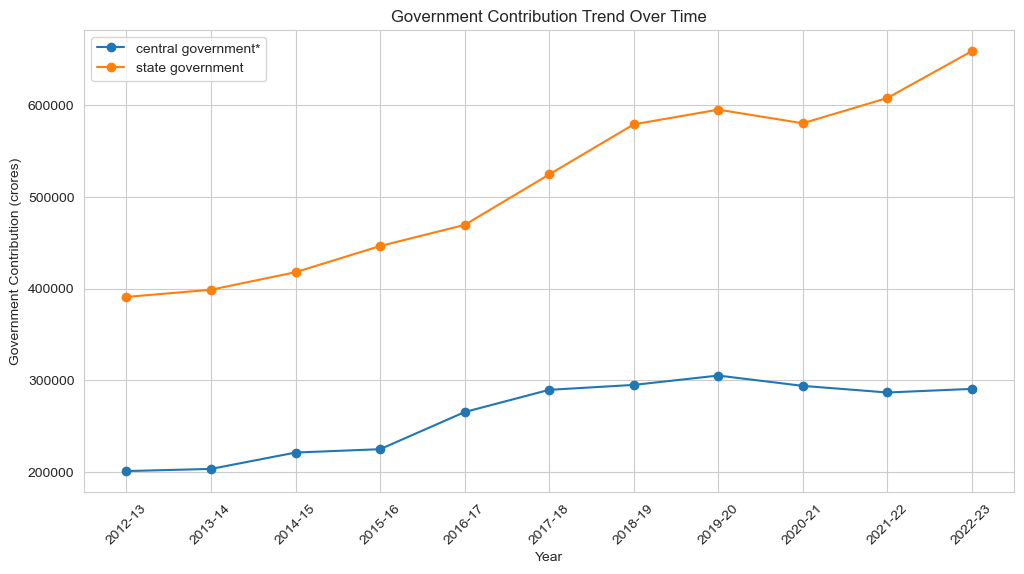

In [196]:
plt.figure(figsize=(12, 6))
for gov_type in ["central government*", "state government"]:
    gov_values = df[df["Item Desription"] == gov_type][years].values.flatten()
    plt.plot(years, gov_values, marker='o', label=gov_type)

plt.xlabel("Year")
plt.ylabel("Government Contribution (crores)")
plt.title("Government Contribution Trend Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


Expenditure Data loaded successfully.
GVA Data loaded successfully.
Expenditure Data:
  क्र.सं.                         मद  सामान्‍य सार्वजिनक सेवाएं     रक्षा   \
0     NaN                        NaN                         NaN       NaN   
1       1                          2                         3.0       4.0   
2       1               पूंजीतर व्यय                    785120.0  472076.0   
3     1.1                उपभोग व्यय                     266383.0  470465.0   
4   1.1.1  कर्मचारियों का पारिश्रमिक                    191688.0  380607.0   

   सार्वजनिक व्यवस्था और सुरक्षा   आर्थिक कार्य   \
0                             NaN            NaN   
1                             5.0            6.0   
2                        411594.0      1502064.0   
3                        406042.0       154101.0   
4                        386089.0       120922.0   

          सामान्‍य प्रशासन, विनियमन और अनुसंधान   \
0  general administration, regulation & research   
1                           

C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:67: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:67: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:67: UserWarning: Glyph 2370 (\N{DEVANAGARI VOWEL SIGN UU}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:67: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:67: UserWarning: Glyph 2332 (\N{DEVANAGARI LETTER JA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:67: UserWarning: Glyph 2368 (\N{DEVANAGARI VOWEL SIGN II}) missing from current font.
 

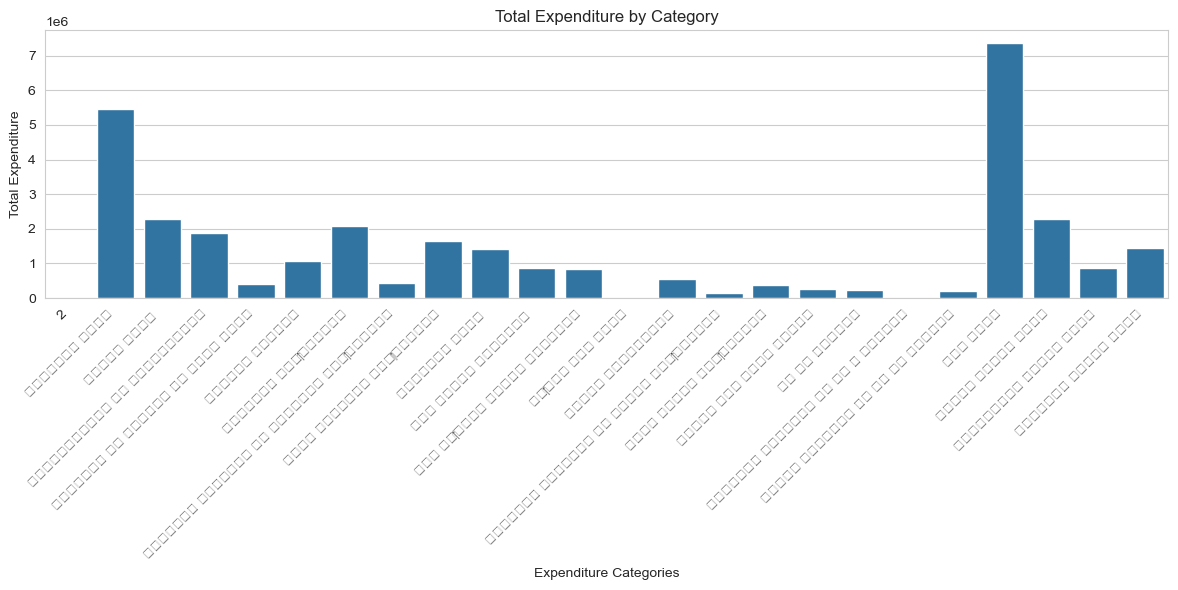

Error: Required columns for lineplot not found in GVA data.
Error: Required columns for state-wise GVA not found in GVA data.


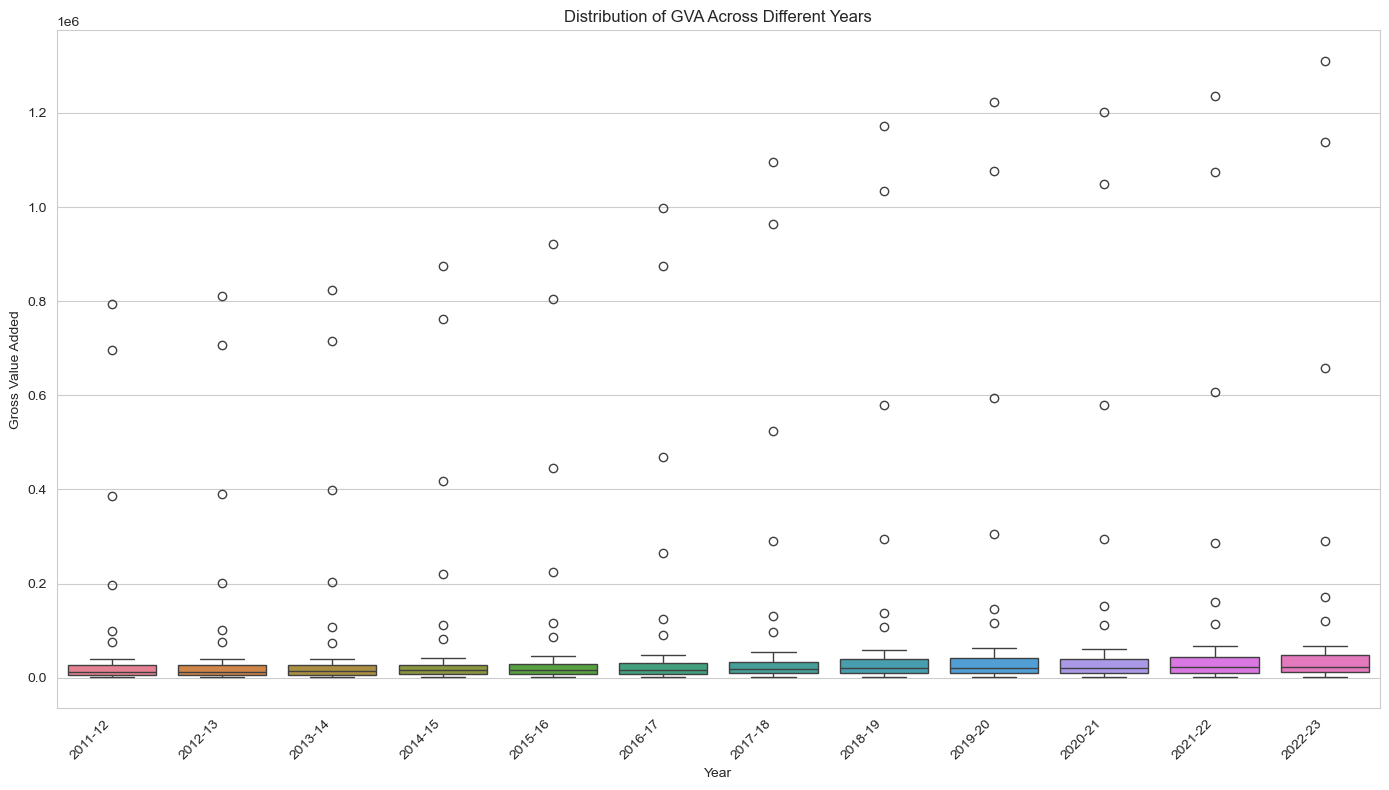

Error: Exactly two valid columns needed for scatter plot


C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:149: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:149: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:149: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:149: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:149: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:149: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
 

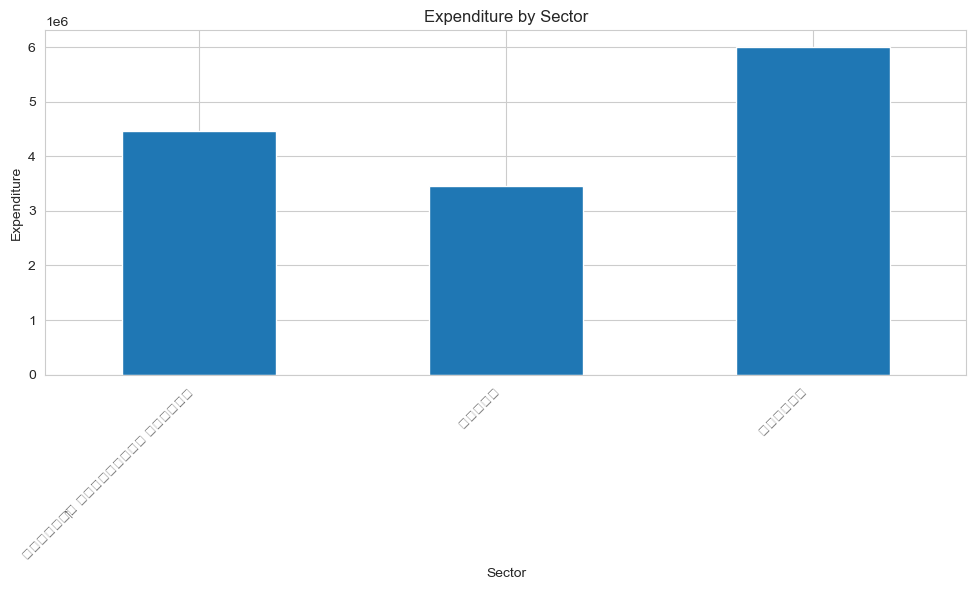

C:\Users\SushilSC\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from current font.
  fig.canvas.draw()
C:\Users\SushilSC\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
C:\Users\SushilSC\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.draw()
C:\Users\SushilSC\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  fig.canvas.draw()
C:\Users\SushilSC\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  fig.canvas.draw()
C:\Users\SushilSC\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.draw()
C:\Users\S

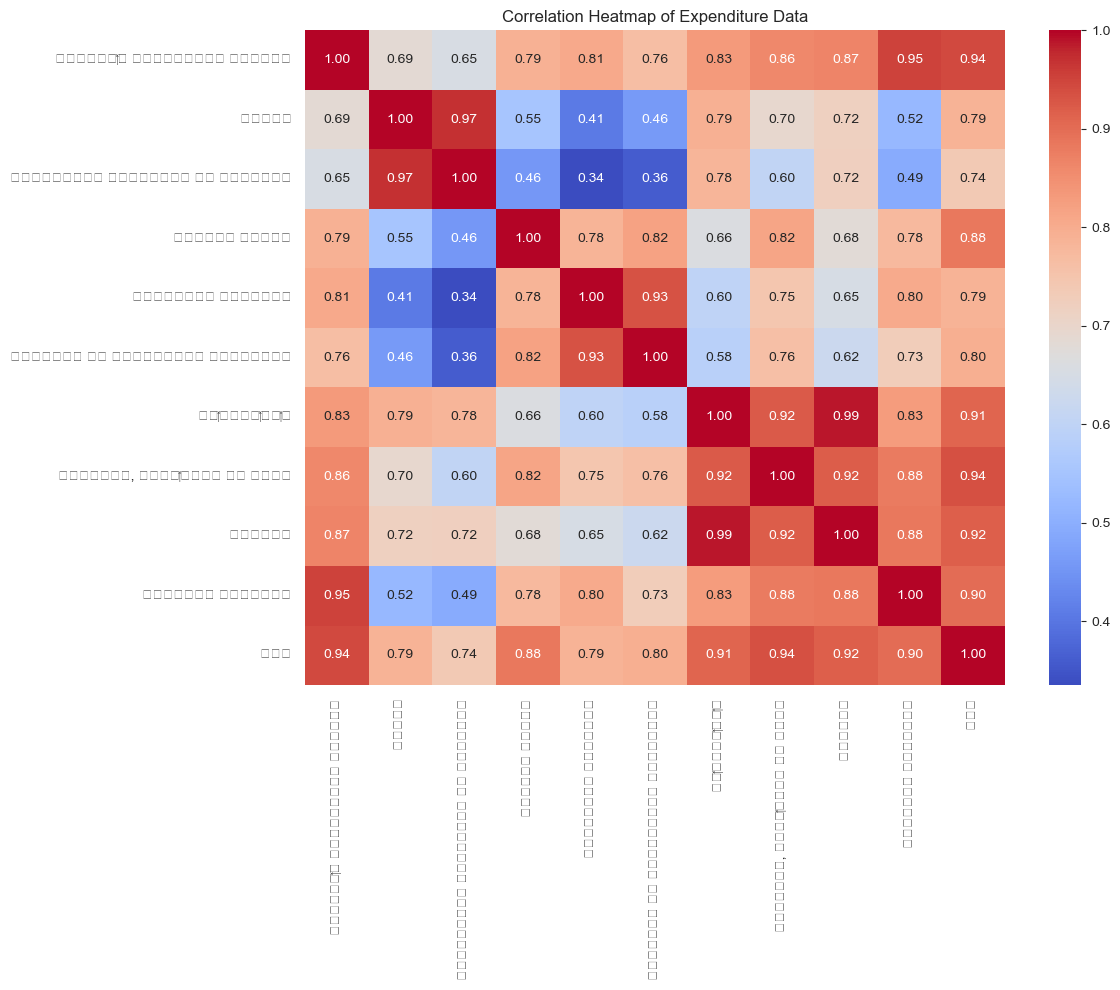

C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:181: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:181: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:181: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:181: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:181: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:181: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
 

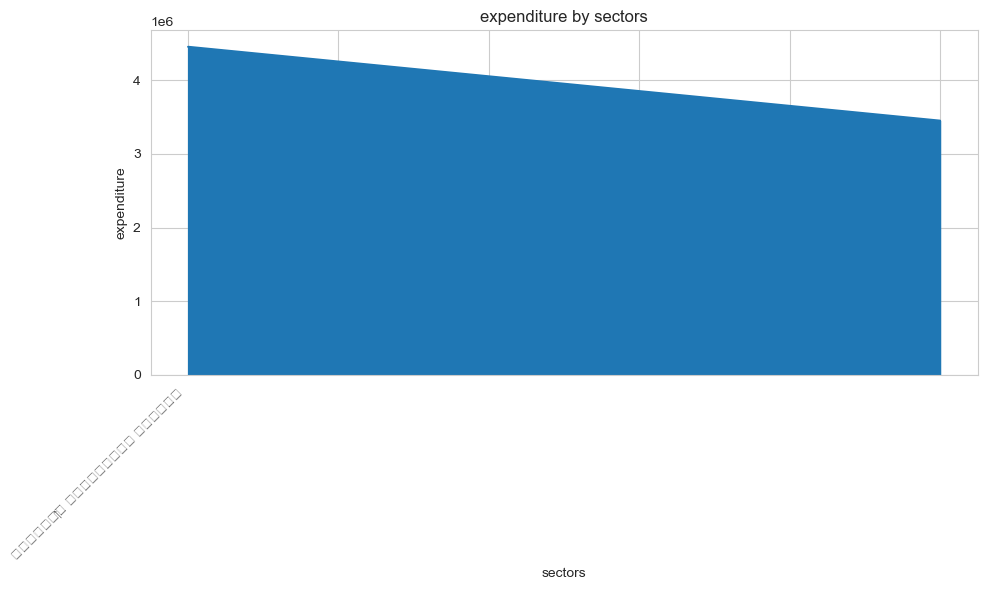

C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:197: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:197: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:197: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:197: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:197: UserWarning: Glyph 2359 (\N{DEVANAGARI LETTER SSA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:197: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.


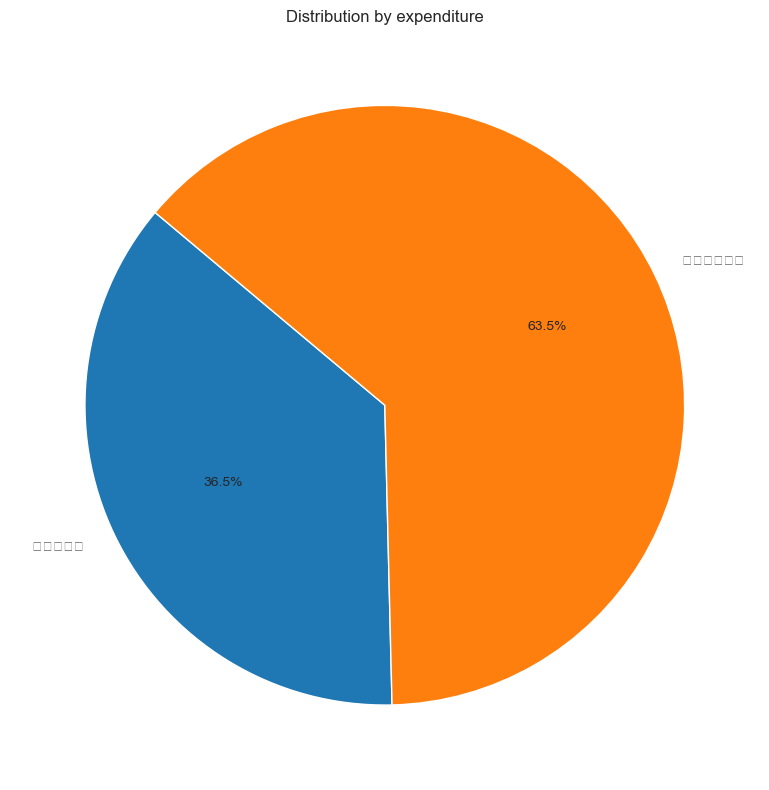

C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:212: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:212: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:212: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:212: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:212: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  plt.tight_layout()
C:\Users\SushilSC\AppData\Local\Temp\ipykernel_32556\994452854.py:212: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
 

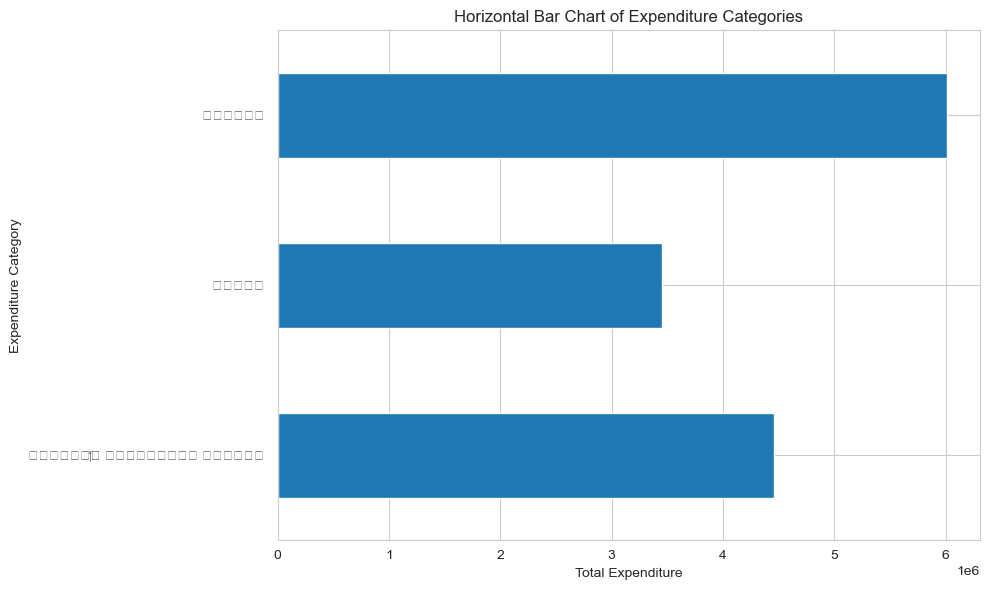

In [192]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Loading Data
# Load the expenditure data from 4.2NEWW.xlsx
try:
    expenditure_data = pd.read_excel('4.2NEWW.xlsx', sheet_name='Sheet1')
    print("Expenditure Data loaded successfully.")
except FileNotFoundError:
    print("Error: Expenditure data file not found.")
    expenditure_data = None

# Load the GVA data from 4.1NEWW.xlsx
try:
    gva_data = pd.read_excel('4.1NEWW.xlsx', sheet_name='Sheet1')
    print("GVA Data loaded successfully.")
except FileNotFoundError:
    print("Error: GVA data file not found.")
    gva_data = None

# Skip further processing if data loading failed
if expenditure_data is None or gva_data is None:
    print("Skipping further processing due to data loading failure.")
else:
    # Display the first few rows of each dataset
    print("Expenditure Data:")
    print(expenditure_data.head())

    print("\nGVA Data:")
    print(gva_data.head())

    # Display column names to identify correct columns for GVA Data
    print("\nColumn Names in GVA Data:")
    print(gva_data.columns)
    print("\nColumn Names in Expenditure Data:")
    print(expenditure_data.columns)

    # Data Exploration
    # Summary statistics for expenditure data
    expenditure_summary = expenditure_data.describe()

    # Summary statistics for GVA data
    gva_summary = gva_data.describe()

    print("\nSummary Statistics for Expenditure Data:")
    print(expenditure_summary)

    print("\nSummary Statistics for GVA Data:")
    print(gva_summary)

    # Visualizations

    ## Plotting total expenditure over different categories
    if 'मद' in expenditure_data.columns and 'कुल ' in expenditure_data.columns:
        plt.figure(figsize=(12, 6))
        sns.barplot(x='मद', y='कुल ', data=expenditure_data)  # Adjusted column name based on actual dataset structure
        plt.title('Total Expenditure by Category')
        plt.xlabel('Expenditure Categories')
        plt.ylabel('Total Expenditure')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Error: Required columns for barplot not found in expenditure data.")

    ## Plotting Gross Value Added over the years
    # Ensure correct column name by stripping any whitespace or special characters
    gva_column_name = 'सकल मूल्य वर्धन'  # Replace with the correct column name if needed

    # Ensure the column exists in the DataFrame
    if 'क्र. सं.' in gva_data.columns and gva_column_name in gva_data.columns:
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=gva_data, x='क्र. सं.', y=gva_column_name)  # Adjusted based on actual column names in your file
        plt.title('Gross Value Added Over Years')
        plt.xlabel('Year')
        plt.ylabel('Gross Value Added')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Error: Required columns for lineplot not found in GVA data.")

    ## Additional Visualization: State-wise GVA Contribution (Example)
    # Correct and Robust Column Selection for State-wise GVA Contribution
    state_columns = ['आंध्र प्रदेश', 'गुजरात', 'महाराष्ट्र']
    available_columns = [col for col in state_columns if col in gva_data.columns]

    if 'क्र. सं.' in gva_data.columns and available_columns:
        statewise_gva = gva_data[['क्र. सं.'] + available_columns]  # Select available state columns

        statewise_gva.plot(x='क्र. सं.', figsize=(12, 6))
        plt.title('State-wise GVA Contribution Over Years')
        plt.xlabel('Year')
        plt.ylabel('Gross Value Added')
        plt.legend(title="States")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Error: Required columns for state-wise GVA not found in GVA data.")

    # Visualizations

    # 1. Box Plot of GVA across different years
    year_columns = [col for col in gva_data.columns if col.isdigit() or '-' in str(col)]
    if year_columns:
        plt.figure(figsize=(14, 8))
        sns.boxplot(data=gva_data[year_columns])
        plt.title('Distribution of GVA Across Different Years')
        plt.xlabel('Year')
        plt.ylabel('Gross Value Added')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Error: No valid year columns found in GVA data.")

    # 2. Scatter Plot of expenditure
    sector_cols = ['रक्षा', 'शिक्षा']
    available_sector_cols = [col for col in sector_cols if col in expenditure_data.columns]
    if len(available_sector_cols) == 2:  # Check if we have exactly two columns
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=expenditure_data[available_sector_cols[0]], y=expenditure_data[available_sector_cols[1]], data=expenditure_data)
        plt.title(f'Scatter Plot of {available_sector_cols[0]} vs {available_sector_cols[1]}')
        plt.xlabel(available_sector_cols[0])
        plt.ylabel(available_sector_cols[1])
        plt.tight_layout()
        plt.show()
    else:
        print("Error: Exactly two valid columns needed for scatter plot")

    # 3. Stacked Bar Chart expenditure data
    expenditure_sector = ['सामान्‍य सार्वजिनक सेवाएं ', 'रक्षा ', 'शिक्षा ']
    available_sector_values = [col for col in expenditure_sector if col in expenditure_data.columns]
    if len(available_sector_values) > 1:
        subset_data = expenditure_data[available_sector_values].sum()
        plt.figure(figsize=(10, 6))
        subset_data.plot(kind='bar', stacked=True)
        plt.title('Expenditure by Sector')
        plt.xlabel('Sector')
        plt.ylabel('Expenditure')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Error: Need more then 1 values to draw a chart")

    # 4. Pairwise Relationship
    numeric_expenditure_data = expenditure_data.select_dtypes(include=['number'])
    numeric_columns = numeric_expenditure_data.columns.tolist()

    columns_to_exclude = ['क्र.सं.', 'S.No.']  # Example column names.
    numeric_columns = [col for col in numeric_columns if col not in columns_to_exclude]
    if len(numeric_columns) >= 2:
        correlation_matrix = numeric_expenditure_data[numeric_columns].corr()
        plt.figure(figsize=(12, 10))  # Adjust figure size for better readability
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap of Expenditure Data')
        plt.tight_layout()
        plt.show()
    else:
        print("Less than 2 columns for heatmap")

    # 5. Area Chart of expenditure data
    expenditure_Area = ['सामान्‍य सार्वजिनक सेवाएं ', 'रक्षा ']
    available_expenditure_Area = [col for col in expenditure_Area if col in expenditure_data.columns]
    if len(available_expenditure_Area) > 1:
        subset_data = expenditure_data[available_expenditure_Area]
        plt.figure(figsize=(10, 6))
        subset_data.sum().plot(kind='area', stacked=True)
        plt.title('expenditure by sectors')
        plt.xlabel('sectors')
        plt.ylabel('expenditure')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Area chart not possible as columns are not present")

    # 6. Pie chart for top expenditure data
    Piechart_data = ['रक्षा ', 'शिक्षा ', 'स्‍वास्‍थ्‍य']
    available_data = [col for col in Piechart_data if col in expenditure_data.columns]
    if len(available_data) >= 2:
        # Extract the data
        data_to_plot = expenditure_data[available_data].sum()

        # Create the plot
        plt.figure(figsize=(8, 8))
        plt.pie(data_to_plot, labels=available_data, autopct='%1.1f%%', startangle=140)
        plt.title('Distribution by expenditure')
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough values for a pie chart")

    # 7. Horizontal Bar Chart of Expenditure Data
    expenditure_categories = ['सामान्‍य सार्वजिनक सेवाएं ', 'रक्षा ', 'शिक्षा ', 'स्‍वास्‍थ्‍य']
    available_categories = [col for col in expenditure_categories if col in expenditure_data.columns]
    if available_categories:
        expenditure_subset = expenditure_data[available_categories].sum()
        plt.figure(figsize=(10, 6))
        expenditure_subset.plot(kind='barh')
        plt.title('Horizontal Bar Chart of Expenditure Categories')
        plt.xlabel('Total Expenditure')
        plt.ylabel('Expenditure Category')
        plt.tight_layout()
        plt.show()
    else:
        print("Error: No available categories for horizontal bar chart.")
